In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


url  = 'D:\\Ankit\\Python\\input\\bank.csv'

In [2]:
bank = pd.read_csv(url)

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

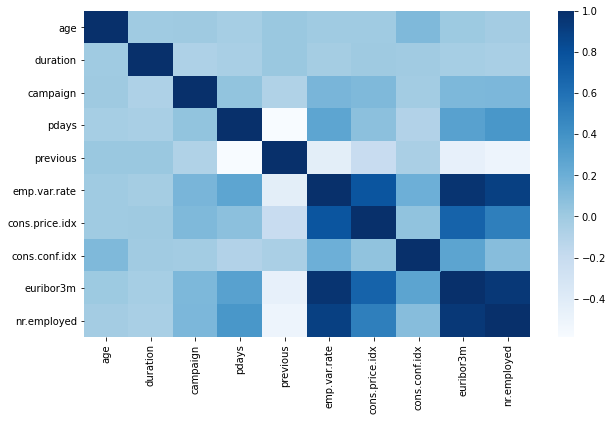

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(bank.corr(),cmap='Blues')

In [160]:
bank['Count']=1
pie = bank['y'].value_counts()
print(pie)

no     36548
yes     4640
Name: y, dtype: int64


([<matplotlib.patches.Wedge at 0x1c92f2c1fa0>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'no'),
  Text(1.125628361280998, -0.4158855519008265, 'yes')],
 [Text(-0.5628141660387418, 0.20794281547126264, '88.7%'),
  Text(0.6566165440805822, -0.2425999052754821, '11.3%')])

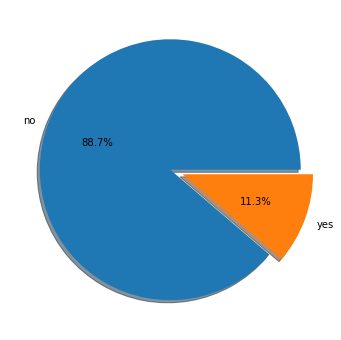

In [138]:
plt.figure(figsize=(13,6))
plt.pie(pie,labels=['no','yes'],autopct='%1.1f%%',shadow=True,explode=(0,0.1))
#sns.barplot(x=bank['y'],y=bank_age['Count'],hue=bank_age['y'])

In [9]:
def age_group(x):
    if x<20:
        return '>20'
    if (x>=20) & (x<30):
        return '>30'
    if (x>=30) & (x<40):
        return '>40'
    if (x>=40) & (x<50):
        return '>50'
    if (x>=50) & (x<60):
        return '>60'
    if (x>=60) & (x<70):
        return '>70'
    if (x>70) & (x<80):
        return '>80'
    if (x>=80) & (x<90):
        return '>90'
    if (x>=90) & (x<100):
        return '>100'

   age_group    y  Count
0       >100   no      5
1       >100  yes      5
2        >20   no     41
3        >20  yes     34
4        >30   no   4706
5        >30  yes    888
6        >40   no  15223
7        >40  yes   1715
8        >50   no   9692
9        >50  yes    834
10       >60   no   6165
11       >60  yes    697
12       >70   no    473
13       >70  yes    251
14       >80   no    147
15       >80  yes    125
16       >90   no     68
17       >90  yes     72


<AxesSubplot:xlabel='age_group', ylabel='Count'>

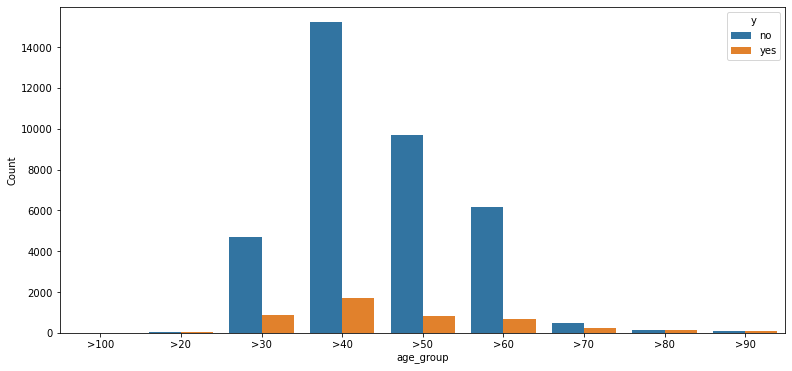

In [145]:
bank['age_group'] = bank['age'].apply(age_group)
bank['age_group'] = bank['age_group'].astype('category')
bank_age = bank.groupby(['age_group','y']).count()['Count'].reset_index()
print(bank_age)
plt.figure(figsize=(13,6))
sns.barplot(x=bank_age['age_group'],y=bank_age['Count'],hue=bank_age['y'])

              job    y  Count
0          admin.   no   9070
1          admin.  yes   1352
2     blue-collar   no   8616
3     blue-collar  yes    638
4    entrepreneur   no   1332
5    entrepreneur  yes    124
6       housemaid   no    954
7       housemaid  yes    106
8      management   no   2596
9      management  yes    328
10        retired   no   1286
11        retired  yes    434
12  self-employed   no   1272
13  self-employed  yes    149
14       services   no   3646
15       services  yes    323
16        student   no    600
17        student  yes    275
18     technician   no   6013
19     technician  yes    730
20     unemployed   no    870
21     unemployed  yes    144
22        unknown   no    293
23        unknown  yes     37


<AxesSubplot:xlabel='job', ylabel='Count'>

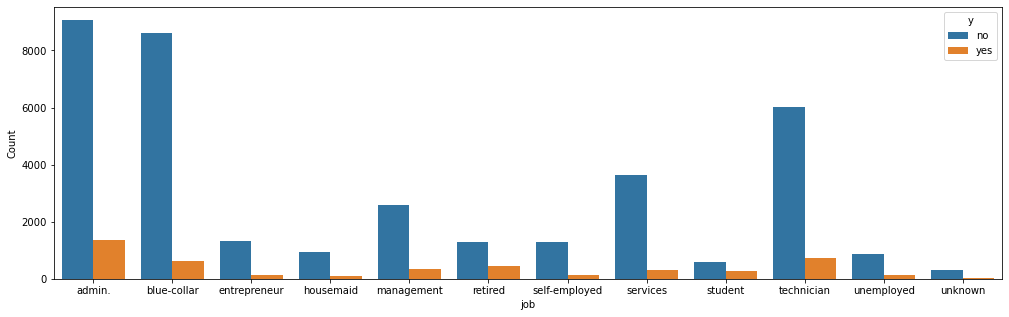

In [161]:
bank_job=bank.groupby(['job','y']).count()['Count'].reset_index()
print(bank_job)
plt.figure(figsize = (17,5))
sns.barplot(x=bank_job['job'],y=bank_job['Count'],hue=bank_job['y'])

    marital    y  Count
0  divorced   no   4136
1  divorced  yes    476
2   married   no  22396
3   married  yes   2532
4    single   no   9948
5    single  yes   1620
6   unknown   no     68
7   unknown  yes     12


<AxesSubplot:xlabel='marital', ylabel='Count'>

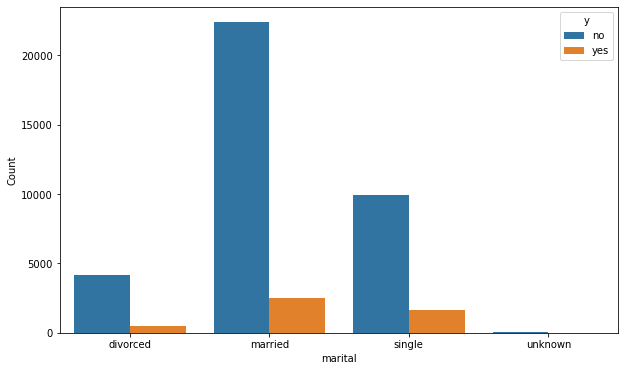

In [12]:
bank_mari = bank.groupby(['marital','y']).count()['Count'].reset_index()
print(bank_mari)
plt.figure(figsize=(10,6))
sns.barplot(x=bank_mari['marital'],y=bank_mari['Count'],hue=bank_mari['y'])

              education    y  Count
0              basic.4y   no   3748
1              basic.4y  yes    428
2              basic.6y   no   2104
3              basic.6y  yes    188
4              basic.9y   no   5572
5              basic.9y  yes    473
6           high.school   no   8484
7           high.school  yes   1031
8            illiterate   no     14
9            illiterate  yes      4
10  professional.course   no   4648
11  professional.course  yes    595
12    university.degree   no  10498
13    university.degree  yes   1670
14              unknown   no   1480
15              unknown  yes    251


<AxesSubplot:xlabel='education', ylabel='Count'>

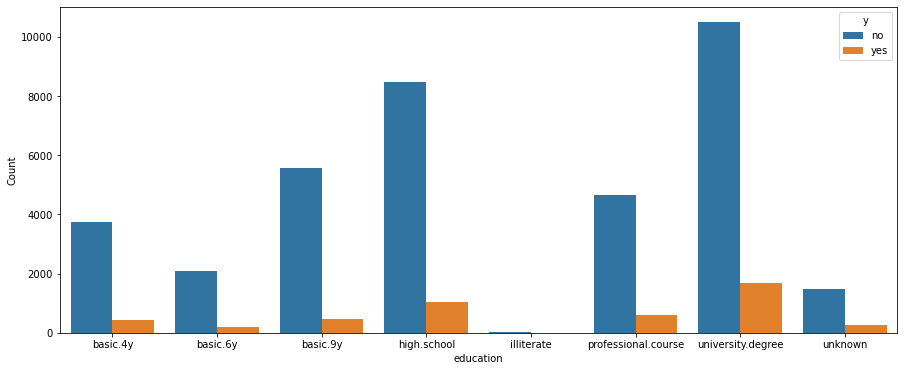

In [13]:
bank_edu = bank.groupby(['education','y']).count()['Count'].reset_index()
print(bank_edu)
plt.figure(figsize=(15,6))
sns.barplot(x=bank_edu['education'],y=bank_edu['Count'],hue=bank_edu['y'])

   default    y  Count
0       no   no  28391
1       no  yes   4197
2  unknown   no   8154
3  unknown  yes    443
4      yes   no      3


<AxesSubplot:xlabel='default', ylabel='Count'>

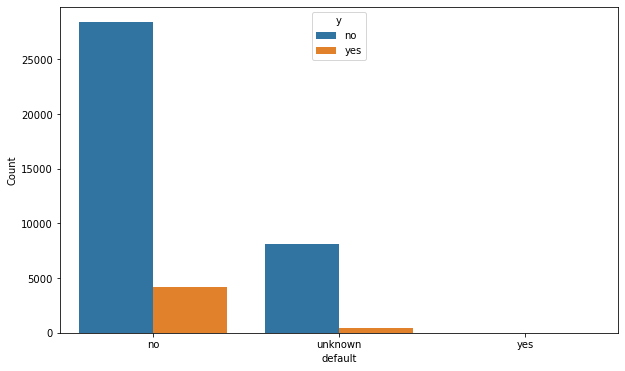

In [14]:
bank_def = bank.groupby(['default','y']).count()['Count'].reset_index()
print(bank_def)
plt.figure(figsize=(10,6))
sns.barplot(x=bank_def['default'],y=bank_def['Count'],hue=bank_def['y'])

   housing    y  Count
0       no   no  16596
1       no  yes   2026
2  unknown   no    883
3  unknown  yes    107
4      yes   no  19069
5      yes  yes   2507


<AxesSubplot:xlabel='housing', ylabel='Count'>

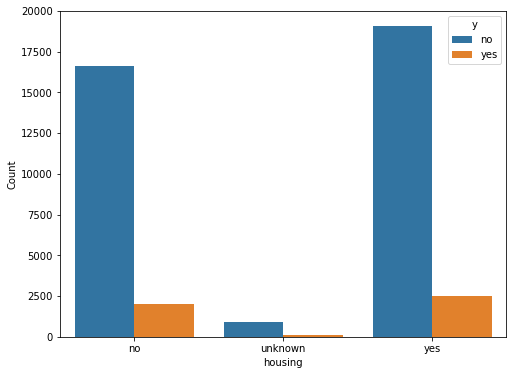

In [15]:
bank_housing = bank.groupby(['housing','y']).count()['Count'].reset_index()
print(bank_housing)
plt.figure(figsize =(8,6))
sns.barplot(x = bank_housing['housing'],y=bank_housing['Count'],hue=bank_housing['y'])

      loan    y  Count
0       no   no  30100
1       no  yes   3850
2  unknown   no    883
3  unknown  yes    107
4      yes   no   5565
5      yes  yes    683


<AxesSubplot:xlabel='loan', ylabel='Count'>

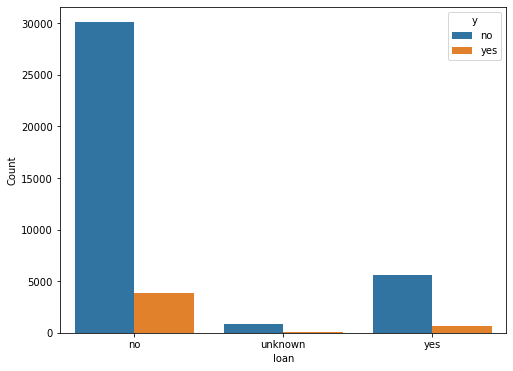

In [16]:
bank_loan = bank.groupby(['loan','y']).count()['Count'].reset_index()
print(bank_loan)
plt.figure(figsize =(8,6))
sns.barplot(x = bank_loan['loan'],y=bank_loan['Count'],hue=bank_loan['y'])

   month    y  Count
0    apr   no   2093
1    apr  yes    539
2    aug   no   5523
3    aug  yes    655
4    dec   no     93
5    dec  yes     89
6    jul   no   6525
7    jul  yes    649
8    jun   no   4759
9    jun  yes    559
10   mar   no    270
11   mar  yes    276
12   may   no  12883
13   may  yes    886
14   nov   no   3685
15   nov  yes    416
16   oct   no    403
17   oct  yes    315
18   sep   no    314
19   sep  yes    256


<AxesSubplot:xlabel='month', ylabel='Count'>

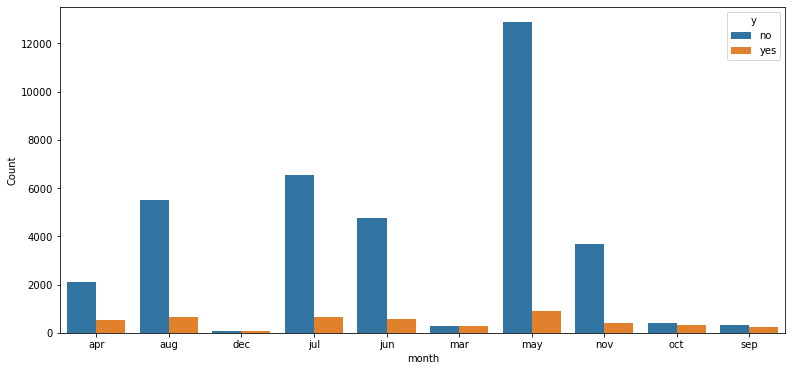

In [17]:
bank_month = bank.groupby(['month','y']).count()['Count'].reset_index()
print(bank_month)
plt.figure(figsize =(13,6))
sns.barplot(x = bank_month['month'],y=bank_month['Count'],hue=bank_month['y'])

  day_of_week    y  Count
0         fri   no   6981
1         fri  yes    846
2         mon   no   7667
3         mon  yes    847
4         thu   no   7578
5         thu  yes   1045
6         tue   no   7137
7         tue  yes    953
8         wed   no   7185
9         wed  yes    949


<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

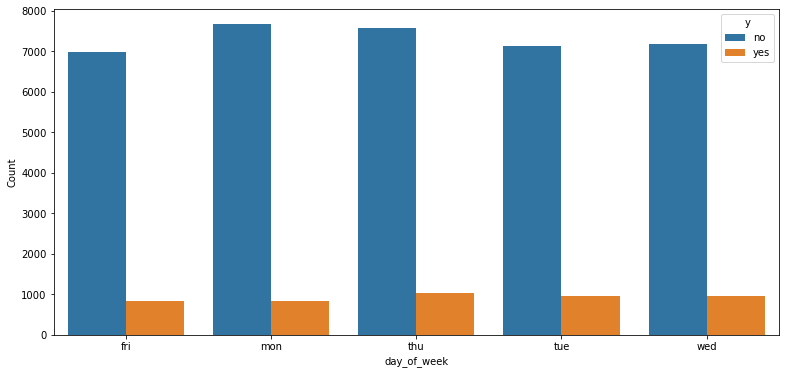

In [18]:
bank_day = bank.groupby(['day_of_week','y']).count()['Count'].reset_index()
print(bank_day)
plt.figure(figsize =(13,6))
sns.barplot(x = bank_day['day_of_week'],y=bank_day['Count'],hue=bank_day['y'])

   pdays    y    Count
0      0   no      5.0
1      0  yes     10.0
2      1   no     18.0
3      1  yes      8.0
4      2   no     24.0
5      2  yes     37.0
6      3   no    141.0
7      3  yes    298.0
8      4   no     55.0
9      4  yes     63.0
10     5   no     17.0
11     5  yes     29.0
12     6   no    123.0
13     6  yes    289.0
14     7   no     20.0
15     7  yes     40.0
16     8   no      6.0
17     8  yes     12.0
18     9   no     29.0
19     9  yes     35.0
20    10   no     22.0
21    10  yes     30.0
22    11   no     13.0
23    11  yes     15.0
24    12   no     32.0
25    12  yes     26.0
26    13   no      8.0
27    13  yes     28.0
28    14   no      9.0
29    14  yes     11.0
30    15   no      8.0
31    15  yes     16.0
32    16   no      5.0
33    16  yes      6.0
34    17   no      6.0
35    17  yes      2.0
36    18   no      3.0
37    18  yes      4.0
38    19   no      2.0
39    19  yes      1.0
40    20   no      1.0
41    20  yes      NaN
42    21   

<AxesSubplot:xlabel='pdays', ylabel='Count'>

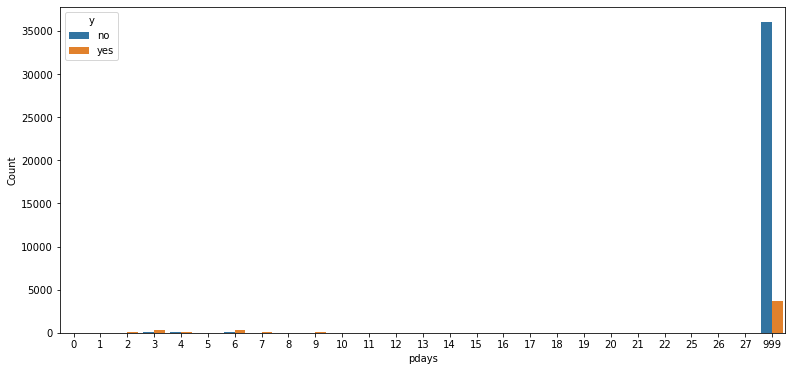

In [19]:
bank['pdays']= bank['pdays'].astype('category')
bank_pday = bank.groupby(['pdays','y']).count()['Count'].reset_index()
print(bank_pday)
plt.figure(figsize =(13,6))
sns.barplot(x = bank_pday['pdays'],y=bank_pday['Count'],hue=bank_pday['y'])

   previous    y    Count
0         0   no  32422.0
1         0  yes   3141.0
2         1   no   3594.0
3         1  yes    967.0
4         2   no    404.0
5         2  yes    350.0
6         3   no     88.0
7         3  yes    128.0
8         4   no     32.0
9         4  yes     38.0
10        5   no      5.0
11        5  yes     13.0
12        6   no      2.0
13        6  yes      3.0
14        7   no      1.0
15        7  yes      NaN


<AxesSubplot:xlabel='previous', ylabel='Count'>

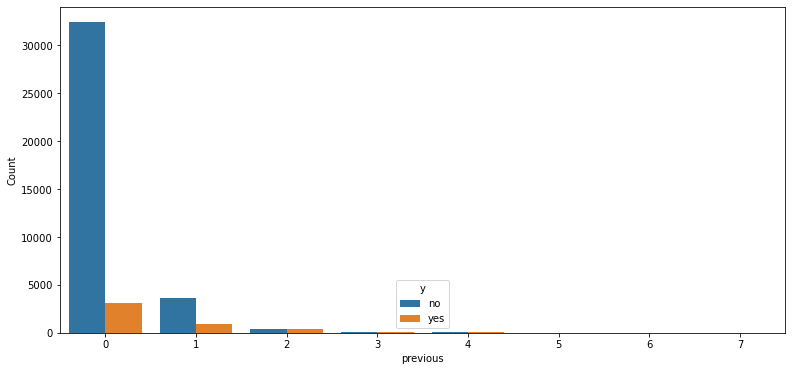

In [20]:
bank['previous'] = bank['previous'].astype('category')
bank_prev = bank.groupby(['previous','y']).count()['Count'].reset_index()
print(bank_prev)
plt.figure(figsize =(13,6))
sns.barplot(x = bank_prev['previous'],y=bank_prev['Count'],hue=bank_prev['y'])

      poutcome    y  Count
0      failure   no   3647
1      failure  yes    605
2  nonexistent   no  32422
3  nonexistent  yes   3141
4      success   no    479
5      success  yes    894


<AxesSubplot:xlabel='poutcome', ylabel='Count'>

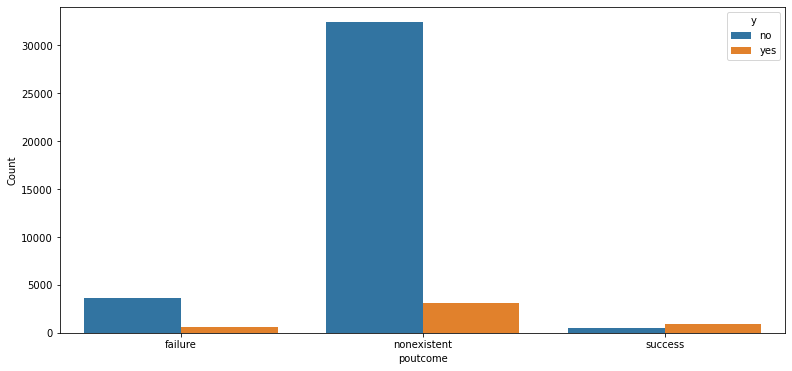

In [21]:
bank_pcome = bank.groupby(['poutcome','y']).count()['Count'].reset_index()
print(bank_pcome)
plt.figure(figsize =(13,6))
sns.barplot(x = bank_pcome['poutcome'],y=bank_pcome['Count'],hue=bank_pcome['y'])

<AxesSubplot:xlabel='emp.var.rate', ylabel='euribor3m'>

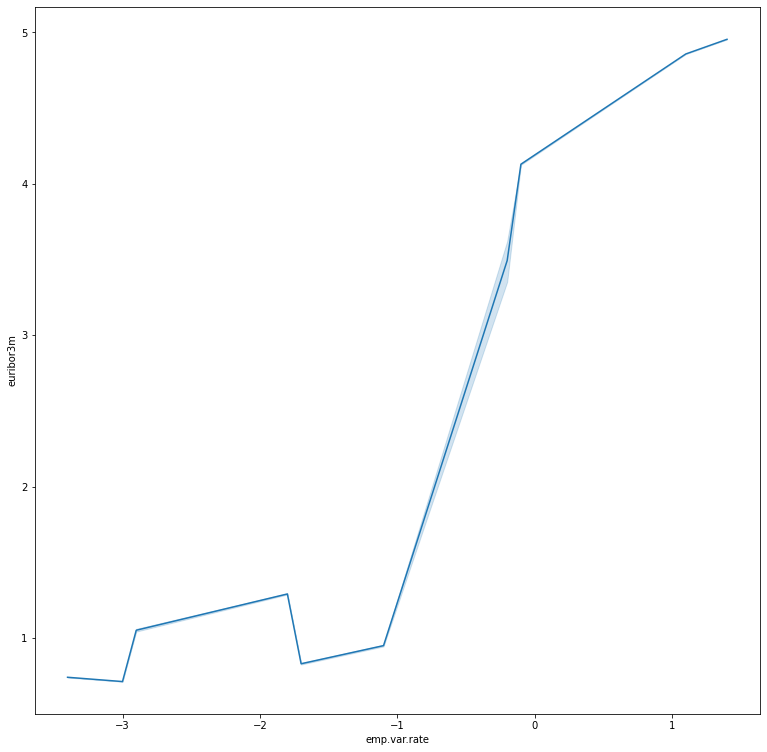

In [22]:
plt.figure(figsize =(13,13))
sns.lineplot(y = bank['euribor3m'],x=bank['emp.var.rate'])

In [23]:
X = bank.copy()
Y = X.pop('y')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  category
 13  previous        41188 non-null  category
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [25]:
bank_dummy = pd.get_dummies(X[['job','marital','education','default','housing',
                                      'loan','contact','month','day_of_week','pdays','previous','poutcome','age_group']])

In [84]:
bank_concat = pd.concat((X.drop(['job','marital','education','default','housing','age',
                   'loan','contact','month','day_of_week','pdays','previous','poutcome','Count','age_group','duration'],axis=1),
                    bank_dummy.drop(['pdays_8','pdays_1','pdays_10','pdays_7','pdays_0','pdays_9','pdays_13','pdays_14',
                    'pdays_15','pdays_16','education_illiterate','age_group_>100','default_yes',
                    'pdays_5','pdays_11','pdays_17','pdays_18','pdays_19','pdays_20','pdays_21','pdays_22',
                    'pdays_25','pdays_26','pdays_27','previous_5','previous_6','previous_7','previous_4','marital_unknown',
                    'pdays_12','pdays_2'],axis=1)),axis=1)

In [85]:
bank_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       41188 non-null  int64  
 1   emp.var.rate                   41188 non-null  float64
 2   cons.price.idx                 41188 non-null  float64
 3   cons.conf.idx                  41188 non-null  float64
 4   euribor3m                      41188 non-null  float64
 5   nr.employed                    41188 non-null  float64
 6   job_admin.                     41188 non-null  uint8  
 7   job_blue-collar                41188 non-null  uint8  
 8   job_entrepreneur               41188 non-null  uint8  
 9   job_housemaid                  41188 non-null  uint8  
 10  job_management                 41188 non-null  uint8  
 11  job_retired                    41188 non-null  uint8  
 12  job_self-employed              41188 non-null 

Performing Standard Sacling

In [86]:
scale = StandardScaler()

In [87]:
bank_std = scale.fit_transform(bank_concat)

Performing Train Test Split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(bank_std,Y,test_size=0.2)

In [89]:
smt = SMOTE()

In [90]:
X_train_smt,y_train_smt = smt.fit_sample(X_train,y_train)

In [91]:
y_train.value_counts(),y_train_smt.value_counts()

(no     29212
 yes     3738
 Name: y, dtype: int64,
 no     29212
 yes    29212
 Name: y, dtype: int64)

In [92]:
logic = LogisticRegression()
logic.fit(X_train_smt,y_train_smt)
logic_predict = logic.predict(X_test)

c:\users\kumar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
print('Accuracy Score',accuracy_score(y_test,logic_predict))
print(confusion_matrix(y_test,logic_predict))
print(classification_report(y_test,logic_predict))

Accuracy Score 0.818766690944404
[[6179 1157]
 [ 336  566]]
              precision    recall  f1-score   support

          no       0.95      0.84      0.89      7336
         yes       0.33      0.63      0.43       902

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.66      8238
weighted avg       0.88      0.82      0.84      8238



In [94]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(logic, bank_std, Y, cv=cv)

c:\users\kumar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\kumar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.89835721, 0.89981387, 0.90118961, 0.89843813, 0.89382536])

In [101]:
rfc = RandomForestClassifier(n_estimators=120,max_depth=35,min_samples_leaf=3)
rfc.fit(X_train_smt,y_train_smt)
rfc_predict = rfc.predict(X_test)

In [102]:
print('Accuracy Score',accuracy_score(y_test,rfc_predict))
print(confusion_matrix(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict))

Accuracy Score 0.8920854576353484
[[6977  359]
 [ 530  372]]
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7336
         yes       0.51      0.41      0.46       902

    accuracy                           0.89      8238
   macro avg       0.72      0.68      0.70      8238
weighted avg       0.88      0.89      0.89      8238



In [103]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(rfc, bank_std, Y, cv=cv)

array([0.89884276, 0.90070405, 0.90256535, 0.89746702, 0.89439184])

In [98]:
sorted(list(zip(rfc.feature_importances_,bank_concat.columns)),reverse=True)

[(0.11455430357862313, 'euribor3m'),
 (0.06646483509999822, 'campaign'),
 (0.062493332714239055, 'nr.employed'),
 (0.061475278440630526, 'emp.var.rate'),
 (0.04036022462052091, 'cons.conf.idx'),
 (0.036920766516825736, 'housing_yes'),
 (0.03446587129282316, 'housing_no'),
 (0.033001901503494954, 'contact_telephone'),
 (0.02851464183277784, 'age_group_>50'),
 (0.027958674906681125, 'cons.price.idx'),
 (0.025779330963309945, 'age_group_>40'),
 (0.025390068635812953, 'contact_cellular'),
 (0.02261116733790592, 'pdays_999'),
 (0.022295888191520577, 'month_may'),
 (0.020838078191699718, 'marital_married'),
 (0.02051481007188311, 'day_of_week_thu'),
 (0.02024314211120493, 'day_of_week_wed'),
 (0.020156619736704035, 'education_university.degree'),
 (0.020151578150879302, 'day_of_week_mon'),
 (0.0195811131366469, 'day_of_week_fri'),
 (0.019303757182919722, 'default_unknown'),
 (0.017792476409114792, 'default_no'),
 (0.017568712178444447, 'day_of_week_tue'),
 (0.017503428344436172, 'marital_sin

In [99]:
param = {'n_estimators':[120,150,180,200],'max_depth':[20,25,30,35],'min_samples_leaf':[3,5,7]}
gs = GridSearchCV(rfc,param,verbose=3)
gs.fit(X_train_smt,y_train_smt

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=20, min_samples_leaf=3, n_estimators=120 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=20, min_samples_leaf=3, n_estimators=120, score=0.799, total=  11.3s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=120 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV]  max_depth=20, min_samples_leaf=3, n_estimators=120, score=0.958, total=  10.4s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=120 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.7s remaining:    0.0s


[CV]  max_depth=20, min_samples_leaf=3, n_estimators=120, score=0.961, total=  10.7s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=120 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=120, score=0.957, total=  10.6s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=120 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=120, score=0.960, total=  10.5s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=150 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=150, score=0.798, total=  13.1s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=150 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=150, score=0.959, total=  12.9s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=150 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=150, score=0.961, total=  13.0s
[CV] max_depth=20, min_samples_leaf=3, n_estimators=150 ..............
[CV]  max_depth=20, min_samples_leaf=3, n_estimators=150, score=

[CV]  max_depth=20, min_samples_leaf=7, n_estimators=200, score=0.803, total=  16.6s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=200, score=0.948, total=  16.4s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=200, score=0.948, total=  16.7s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=200, score=0.947, total=  16.8s
[CV] max_depth=20, min_samples_leaf=7, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=7, n_estimators=200, score=0.948, total=  16.6s
[CV] max_depth=25, min_samples_leaf=3, n_estimators=120 ..............
[CV]  max_depth=25, min_samples_leaf=3, n_estimators=120, score=0.799, total=  11.0s
[CV] max_depth=25, min_samples_leaf=3, n_estimators=120 ..............
[CV]  max_depth=25, min_samples_leaf=3, n_estimators=120, score=

[CV]  max_depth=25, min_samples_leaf=7, n_estimators=150, score=0.948, total=  12.9s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=150 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=150, score=0.950, total=  12.8s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=180 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=180, score=0.801, total=  17.1s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=180 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=180, score=0.949, total=  15.4s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=180 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=180, score=0.952, total=  15.3s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=180 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=180, score=0.950, total=  14.9s
[CV] max_depth=25, min_samples_leaf=7, n_estimators=180 ..............
[CV]  max_depth=25, min_samples_leaf=7, n_estimators=180, score=

[CV]  max_depth=30, min_samples_leaf=7, n_estimators=120, score=0.947, total=  10.3s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=120 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=120, score=0.952, total=  10.4s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=120 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=120, score=0.948, total=  10.2s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=120 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=120, score=0.951, total=  10.3s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=150 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=150, score=0.802, total=  12.8s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=150 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=150, score=0.948, total=  12.8s
[CV] max_depth=30, min_samples_leaf=7, n_estimators=150 ..............
[CV]  max_depth=30, min_samples_leaf=7, n_estimators=150, score=

[CV]  max_depth=35, min_samples_leaf=5, n_estimators=180, score=0.957, total=  15.9s
[CV] max_depth=35, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=35, min_samples_leaf=5, n_estimators=200, score=0.802, total=  17.7s
[CV] max_depth=35, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=35, min_samples_leaf=5, n_estimators=200, score=0.956, total=  17.6s
[CV] max_depth=35, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=35, min_samples_leaf=5, n_estimators=200, score=0.958, total=  21.9s
[CV] max_depth=35, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=35, min_samples_leaf=5, n_estimators=200, score=0.954, total=  17.8s
[CV] max_depth=35, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=35, min_samples_leaf=5, n_estimators=200, score=0.957, total=  17.6s
[CV] max_depth=35, min_samples_leaf=7, n_estimators=120 ..............
[CV]  max_depth=35, min_samples_leaf=7, n_estimators=120, score=

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 69.5min finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=25, min_samples_leaf=3,
                                              n_estimators=120),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [3, 5, 7],
                         'n_estimators': [120, 150, 180, 200]},
             verbose=3)

In [100]:
gs.best_estimator_

RandomForestClassifier(max_depth=35, min_samples_leaf=3, n_estimators=120)

In [104]:
adbst = AdaBoostClassifier(n_estimators=120,random_state=101)
adbst.fit(X_train_smt, y_train_smt)
adbst_predict = adbst.predict(X_test)

In [105]:
print('Accuracy Score',accuracy_score(y_test,adbst_predict))
print(confusion_matrix(y_test,adbst_predict))
print(classification_report(y_test,adbst_predict))

Accuracy Score 0.8917212915756252
[[6991  345]
 [ 547  355]]
              precision    recall  f1-score   support

          no       0.93      0.95      0.94      7336
         yes       0.51      0.39      0.44       902

    accuracy                           0.89      8238
   macro avg       0.72      0.67      0.69      8238
weighted avg       0.88      0.89      0.89      8238



In [106]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(adbst, bank_std, Y, cv=cv)

array([0.90005665, 0.89981387, 0.90280812, 0.89932832, 0.89366351])

In [109]:
gbc = GradientBoostingClassifier(n_estimators=120,max_depth=35,min_samples_leaf=3,random_state=101)
gbc.fit(X_train_smt,y_train_smt)
gbc_predict = gbc.predict(X_test)

In [110]:
print('Accuracy Score',accuracy_score(y_test,gbc_predict))
print(confusion_matrix(y_test,gbc_predict))
print(classification_report(y_test,gbc_predict))

Accuracy Score 0.8832240835154164
[[6992  344]
 [ 618  284]]
              precision    recall  f1-score   support

          no       0.92      0.95      0.94      7336
         yes       0.45      0.31      0.37       902

    accuracy                           0.88      8238
   macro avg       0.69      0.63      0.65      8238
weighted avg       0.87      0.88      0.87      8238



In [111]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(gbc, bank_std, Y, cv=cv)

array([0.88565186, 0.88508538, 0.89034555, 0.88387149, 0.88192927])

In [112]:
xgbf = xgb.XGBClassifier(n_estimators=120,max_depth=35,random_state=101)
xgbf.fit(X_train_smt, y_train_smt)
xgb_predict = xgbf.predict(X_test)

In [113]:
print('Accuracy Score',accuracy_score(y_test,gbc_predict))
print(confusion_matrix(y_test,gbc_predict))
print(classification_report(y_test,gbc_predict))

Accuracy Score 0.8832240835154164
[[6992  344]
 [ 618  284]]
              precision    recall  f1-score   support

          no       0.92      0.95      0.94      7336
         yes       0.45      0.31      0.37       902

    accuracy                           0.88      8238
   macro avg       0.69      0.63      0.65      8238
weighted avg       0.87      0.88      0.87      8238



In [114]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(xgbf, bank_std, Y, cv=cv)

array([0.88589463, 0.88330501, 0.89083111, 0.88249575, 0.87901594])

In [115]:
lgb = LGBMClassifier(n_estimators=120,max_depth=35,random_state=101)
lgb.fit(X_train_smt, y_train_smt)
lgb_predict = lgb.predict(X_test)

In [116]:
print('Accuracy Score',accuracy_score(y_test,lgb_predict))
print(confusion_matrix(y_test,lgb_predict))
print(classification_report(y_test,lgb_predict))

Accuracy Score 0.9016751638747269
[[7147  189]
 [ 621  281]]
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7336
         yes       0.60      0.31      0.41       902

    accuracy                           0.90      8238
   macro avg       0.76      0.64      0.68      8238
weighted avg       0.88      0.90      0.89      8238



In [117]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(gbc, bank_std, Y, cv=cv)

array([0.88565186, 0.88508538, 0.89034555, 0.88387149, 0.88192927])